<a href="https://colab.research.google.com/github/NeoZ666/classroom_DL_EXP/blob/main/FashionMNIST_Autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Autoencoders

<p align="left">
<img src="https://miro.medium.com/max/3110/0*uq2_ZipB9TqI9G_k"/>
</p>

<p>This notebook is aimed at Machine Learning and Deep Learning beginners who are interested in getting a brief understanding of the underlying concepts behind <strong>autoencoders</strong><p>

# Objectives

<ol>
<li>To demonstrate how we can train an AUTOENCODER over <b>Fashion MNIST Dataset</b></li>
<li>To demostrate how we can use an AUTOENCODER for <strong>Face reconstruction</strong></li>
<li>To demonstrate how we can perform <b>Image Denoising</b> via an AUTOENCODER</li>
<li>To demonstrate how we can build a <b>Face Recognition</b> using an AUTOENCODER</li>
</ol>





## What is an **AUTOENCODER** ?

<ul>
<li><b><i>Autoencoders</i></b> are a type of neural network that attempts to mimic its input as closely as possible to its output.</li>
<li>It has aims to take an input, transform it into a reduced representation called <b>Embedding or Latent Space representation</b>. Then, this embedding is transformed back into the original input.</li>
</ul>

<h3><b>Architecture of Autoencoders</b><h3>
<p>An Autoencoder consists of three main components : </p>

* Encoder
* Embedding
* Decoder

<b><em>NOTE: The decoder architecture is the mirror image of an encoder</em></b>

<div align="center">
<img src="https://miro.medium.com/max/1784/1*CRP98rEvxpcdo6gJI3tXWA.png"/>
</div>

<h3><b>Types of Autoencoders : </b></h3>
<p>
<ol>
<li>Vanilla Autoencoder</li>
<li>Sparse Autoencoder</li>
<li>Convolutional Autoencoder</li>
<li>Denoising Autoencoder</li>
<li>Variational Autoencoder</li>
</ol>
etc...
</p>


<div align="center">
<img src="https://static.packt-cdn.com/products/9781789612011/graphics/06965e3d-46b3-418b-a4c6-a39df696159c.png"/>
</div>

## Importing Required Modules

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
import tensorflow.keras.backend as K
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, Callback


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(tf.__version__)
print("ALL MODULES IMPORTED SUCCESSFULLY")

2.17.0
ALL MODULES IMPORTED SUCCESSFULLY


### **Objective#1 : Training an AUTOENCODER over Fashion MNIST Dataset**

#### **Loading Dataset**
<ul>
<li><p><strong>DESC: </strong>Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.</p></li>

<li><p><strong>Why we are dividing the arrays by 255 ??</strong>
<ol>
<li>To prevent overshooting of activation values.</li>
<li>To have a homogenous distribution of weights and biases.</li>
</ol></p></li>
<ul>

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train = X_train.astype('float32')/255.
X_test = X_test.astype('float32') /255.

print()
print(f"Shape of Train Data: {X_train.shape}")
print(f"Shape of Test Data: {X_test.shape}")

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

Shape of Train Data: (60000, 28, 28)
Shape of Test Data: (10000, 28, 28)


#### **Sample Images**

In [3]:
fashionMNIST_classes = {0:"T-shirt/top", 1:"Trouser",
                        2:"Pullover", 3:"Dress",
                        4:"Coat", 5:"Sandal",
                        6:"Shirt", 7:"Sneaker",
                        8:"Bag", 9:"Ankle boot"}

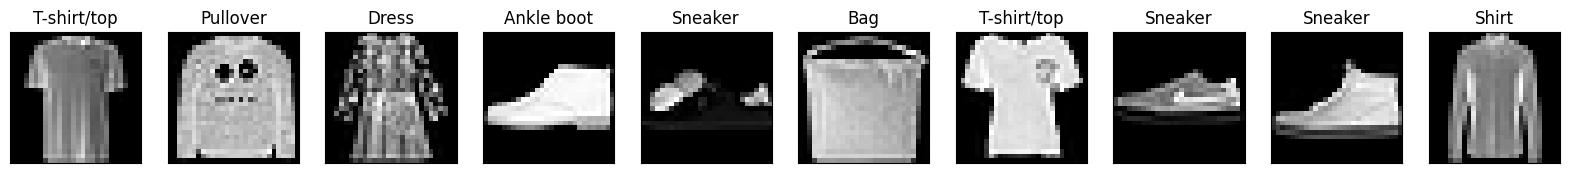

In [4]:
n = 10
plt.figure(figsize = (20, 4))
for i in range(n):
    plt.subplot(1, n, i+1)
    idx = np.random.randint(i, len(X_train))
    plt.imshow(X_train[idx])
    plt.title(fashionMNIST_classes[y_train[idx]])
    plt.gray()
    plt.xticks([]); plt.yticks([])
plt.show()

#### **Building our Autoencoder**

In [9]:
EMBEDDING_DIM = 64

class MNIST_AutoEncoder(Model):
    def __init__(self, embedding_dim):
        super(MNIST_AutoEncoder, self).__init__()
        self.embedding_dim = embedding_dim

        # Building our Encoder
        self.encoder = tf.keras.Sequential([
            layers.Input(shape=(28, 28)),
            layers.Flatten(),
            layers.Dense(self.embedding_dim, activation = "relu"),
        ])

        # Building our Decoder
        self.decoder = tf.keras.Sequential([
            layers.Input(shape=(self.embedding_dim)),
            layers.Dense(784, activation="sigmoid"),
            layers.Reshape((28, 28))
        ])

    def call(self, X):
        encoded = self.encoder(X)
        decoded = self.decoder(encoded)
        return decoded

In [8]:
vanillaAutoencoder = MNIST_AutoEncoder(embedding_dim)
vanillaAutoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

NameError: name 'embedding_dim' is not defined

In [ ]:
vanillaAutoencoder.encoder.summary()

In [ ]:
vanillaAutoencoder.decoder.summary()

In [ ]:
mnist_training_history = vanillaAutoencoder.fit(x = X_train, y = X_train,
                                       epochs = 10,
                                       batch_size = 16,
                                       shuffle = True,
                                       validation_data = (X_test, X_test))

#### **Results**

In [ ]:
# Storing our training and validation losses
train_loss = mnist_training_history.history["loss"]
val_loss = mnist_training_history.history["val_loss"]
epochs = [d for d in range(1,11)]

# Code for plotting train and val loss
plt.figure(figsize=(18, 10))
plt.plot(epochs, train_loss, '-r', label="Training")
plt.plot(epochs, val_loss, '--b', label="Validation")
plt.title("LOSS Curve for Fashion MNIST")
plt.grid(True)
plt.xlabel('Epochs'); plt.ylabel("LOSS")
plt.legend()
plt.xticks([d for d in range(1, 11)])
plt.show();

In [ ]:
# collecting the encoded and decoded versions of our test data
encoded_imgs = vanillaAutoencoder.encoder(X_test).numpy()
decoded_imgs = vanillaAutoencoder.decoder(encoded_imgs).numpy()

# Plotting our original and reconstructed images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # To display the original images
  ax = plt.subplot(2, n, i + 1)
  idx = np.random.randint(i, len(X_test))
  plt.imshow(X_test[idx])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # To display reconstructed images
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[idx])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

### **Objective#2 : Face reconstruction via autoencoder**

#### **Loading Data**
<ul>
<p><strong>DESC: </strong></p>
<li>Self-made dataset by ML4e members.</li>
<li>It has ~2k images for training and ~1k for validation.</li>
<li>Images are of RGB format</li>
<li># of classes : 6</li>
<li>Images has variations like
<ol>
<li>Different facial experssions</li>
<li>Lighting conditions</li>
<li>Face alignments</li>
</ol>

</li>

<ul>

In [ ]:
VAL_LOC = "../input/only-faces/Only_faces/Validation"
TRAIN_LOC = "../input/only-faces/Only_faces/Training"

<p><b>Function for loading train and validation data</b></p>

In [ ]:
def build_data(img_folder_path, normalize = True):
    labels = []
    images = []
    for class_ in os.listdir(img_folder_path):
        img_paths = f"{img_folder_path}/{class_}"
        for img in os.listdir(img_paths):
            image = cv2.imread(os.path.join(img_paths, img))
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = image.astype('float32')
            if normalize:
                image = image/255.
            image = cv2.resize(image, (128, 128))

            images.append(image)
            labels.append(class_)
    images = np.array(images)
    return images, labels

In [ ]:
train_imgs, train_labels = build_data(TRAIN_LOC)
val_imgs, val_labels = build_data(VAL_LOC)

In [ ]:
print(f"Shape of TRAIN DATA : {train_imgs.shape}")
print(f"Shape of VAL DATA : {val_imgs.shape}")

#### **Sample Images**

In [ ]:
n = 5
plt.figure(figsize = (20, 17))
for i in range(n):
    plt.subplot(1, n, i+1)
    idx = np.random.randint(i, len(train_imgs))
    plt.imshow(train_imgs[idx])
    plt.title(train_labels[idx])
    plt.gray()
    plt.xticks([]); plt.yticks([])
plt.show()

#### **Building our Autoencoder**

In [ ]:
class Face_Autoencoder:

    def __init__(self,
                 input_dim,
                 encoder_conv_filters,
                 encoder_conv_kernel_size,
                 encoder_conv_strides,
                 decoder_conv_t_filters,
                 decoder_conv_t_kernel_size,
                 decoder_conv_t_strides,
                 z_dim,
                 use_batch_norm = False,
                 use_dropout= False
                ):

        self.input_dim = input_dim
        self.encoder_conv_filters = encoder_conv_filters
        self.encoder_conv_kernel_size = encoder_conv_kernel_size
        self.encoder_conv_strides = encoder_conv_strides

        self.decoder_conv_t_filters = decoder_conv_t_filters
        self.decoder_conv_t_kernel_size = decoder_conv_t_kernel_size
        self.decoder_conv_t_strides = decoder_conv_t_strides
        self.z_dim = z_dim

        self.use_batch_norm = use_batch_norm
        self.use_dropout = use_dropout

        self.n_layers_encoder = len(encoder_conv_filters)
        self.n_layers_decoder = len(decoder_conv_t_filters)

    def build(self):
        # Encoder
        encoder_input = layers.Input(shape=self.input_dim, name='encoder_input')

        x = encoder_input

        for i in range(self.n_layers_encoder):

            conv_layer = layers.Conv2D(
                filters = self.encoder_conv_filters[i],
                kernel_size = self.encoder_conv_kernel_size[i],
                strides = self.encoder_conv_strides[i],
                padding = 'same',
                name = 'encoder_conv_' + str(i)
                )

            x = conv_layer(x)

            if self.use_batch_norm:
                x = layers.BatchNormalization()(x)

            x = layers.Activation("relu")(x)

            if self.use_dropout:
                x = layers.Dropout(rate = 0.25)(x)


        shape_before_flattening = K.int_shape(x)[1:]

        x = layers.Flatten()(x)
        embedding = layers.Dense(128, name="Embedding")(x)

        # DECODER
        x = layers.Dense(np.prod(shape_before_flattening))(embedding)
        x = layers.Reshape(shape_before_flattening)(x)

        for i in range(self.n_layers_decoder):
            conv_t_layer = layers.Conv2DTranspose(
                filters = self.decoder_conv_t_filters[i],
                kernel_size = self.decoder_conv_t_kernel_size[i],
                strides = self.decoder_conv_t_strides[i],
                padding = 'same',
                name = 'decoder_conv_t_' + str(i)
                )

            x = conv_t_layer(x)

            if i < self.n_layers_decoder - 1:
                if self.use_batch_norm:
                    x = layers.BatchNormalization()(x)
                x = layers.Activation('relu')(x)
                if self.use_dropout:
                    x = layers.Dropout(rate = 0.25)(x)
            else:
              x = layers.Activation('sigmoid')(x)


        decoder_output = x

        ae = Model(inputs=encoder_input, outputs=decoder_output, name="Face_Autoencoder")
        print(ae.summary())
        return ae


    def __str__():
        return "FACE AUTOENCODER"

In [ ]:
IMG_SHAPE = (128, 128, 3)
fae = Face_Autoencoder(input_dim = IMG_SHAPE,
                    encoder_conv_filters=[32,64,64,64],
                    encoder_conv_kernel_size=[3,3,3,3],
                    encoder_conv_strides=[2,2,2,2],
                    decoder_conv_t_filters=[64,64,32,3],
                    decoder_conv_t_kernel_size=[3,3,3,3],
                    decoder_conv_t_strides=[2,2,2,2],
                    z_dim=128,
                    use_batch_norm = False,
                    use_dropout = False)

In [ ]:
face_ae = fae.build()

In [ ]:
plot_model(face_ae, show_shapes = True, show_layer_names=True)

#### **Training our Autoencoder**

<h4><b>Callbacks : </b> A callback is a powerful tool to customize the behavior of your model during training, evaluation, or inference.</h4>
<h4>Tensorflow has some built-in callbacks which we can access from tf.keras.callback module</h4>
<h4>Examples ...</h4>
<ul>
<li>Wants to visualize your training process : <strong>Tensorboard</strong></li>
<li>Wants to schedule your LR while training: <strong>LearningRateSchedular</strong></li>
<li>Wants to save best weights in the training process : <strong>ModelCheckpoint</strong></li>
<li>Wants if stop the training before the completion of all epochs : <strong>EarlyStopping</strong></li>
</ul>
<p>Tensorflow also has provided a Class <b>Callback</b> which helps us to create some custom callbacks</p>

In [ ]:
# Training Hyperparamters
LR = 1e-3
BS = 16
EPOCHS = 20

# Defining Callbacks
class ShowLearning(Callback):
    def on_epoch_end(self, epoch, logs = {}):

        original_imgs = [
                val_imgs[val_labels.index('Subject1') + 17],
                val_imgs[val_labels.index('Subject2')],
                val_imgs[val_labels.index('Subject3')],
                val_imgs[val_labels.index('Subject4') + 2],
                train_imgs[train_labels.index('Subject5') + 7],
                val_imgs[val_labels.index('Subject6') + 4]
                ]
        decoded_imgs = []

        for img in original_imgs:
            decoded_imgs.append(face_ae.predict(np.array([img]))[0])

        n = len(original_imgs)
        plt.figure(figsize=(20, 7))
        for i in range(1, n + 1):
            # Display original
            ax = plt.subplot(2, n, i)
            plt.imshow(original_imgs[i-1]);
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
            plt.title("Original")

            # Display reconstruction
            ax = plt.subplot(2, n, i + n)
            plt.imshow(decoded_imgs[i-1]);
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
            plt.title("Reconstructed")

        plt.show();


show_learning = ShowLearning()


callbacks = [show_learning]

# Model Compilation
face_ae.compile(loss = 'mse', optimizer = "adam")

In [ ]:
face_training_history = face_ae.fit(train_imgs, train_imgs,
                            epochs = EPOCHS,
                            verbose = 1,
                            validation_data = (val_imgs, val_imgs),
                            batch_size = BS,
                            shuffle = True,
                            callbacks = callbacks)

#### **Results**

In [ ]:
# Storing our training and validation losses
train_loss = face_training_history.history["loss"]
val_loss = face_training_history.history["val_loss"]
epochs = [d for d in range(1,EPOCHS + 1)]

# Code for plotting train and val loss
plt.figure(figsize=(18, 10))
plt.plot(epochs, train_loss, '-r', label="Training")
plt.plot(epochs, val_loss, '--b', label="Validation")
plt.title("LOSS Curve for Face reconstruction")
plt.grid(True)
plt.xlabel('Epochs'); plt.ylabel("LOSS")
plt.legend()
plt.xticks(epochs)
plt.show();

In [ ]:
decoded_imgs = face_ae.predict(val_imgs)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  idx = np.random.randint(i, len(val_imgs))
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(val_imgs[idx])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[idx])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

### **Objective#3 : Image Denoising via Autoencoder**

<div align="center"><img src="https://miro.medium.com/max/724/1*qKiQ1noZdw8k05-YRIl6hw.jpeg" width="800px" height="400px"/></div>

In [ ]:
noise_factor = 0.3
train_noisy_imgs = train_imgs + noise_factor*tf.random.normal(shape=train_imgs.shape)
val_noisy_imgs = val_imgs + noise_factor*tf.random.normal(shape=val_imgs.shape)

train_noisy_imgs = tf.clip_by_value(train_noisy_imgs, clip_value_min = 0., clip_value_max = 1.)
val_noisy_imgs = tf.clip_by_value(val_noisy_imgs, clip_value_min = 0., clip_value_max = 1.)

In [ ]:
n = 7
plt.figure(figsize=(20, 6))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    idx = np.random.randint(len(train_imgs))
    plt.imshow(train_imgs[idx]);
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.title("Original")

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(train_noisy_imgs[idx]);
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.title("Original + Noise")

plt.show();

In [ ]:
IMG_SHAPE = (128, 128, 3)
fae = Face_Autoencoder(input_dim = IMG_SHAPE,
                    encoder_conv_filters=[32,64,64,64],
                    encoder_conv_kernel_size=[3,3,3,3],
                    encoder_conv_strides=[2,2,2,2],
                    decoder_conv_t_filters=[64,64,32,3],
                    decoder_conv_t_kernel_size=[3,3,3,3],
                    decoder_conv_t_strides=[2,2,2,2],
                    z_dim=128,
                    use_batch_norm = False,
                    use_dropout = False)

denoisy_fae = fae.build()

In [ ]:
# Training Hyperparamters
LR = 1e-3
BS = 16
EPOCHS = 10

# Model Compilation
denoisy_fae.compile(loss = 'mse', optimizer = "adam")

In [ ]:
denoisy_training_history = denoisy_fae.fit(train_noisy_imgs, train_imgs,
                            epochs = EPOCHS,
                            batch_size = BS,
                            shuffle = True,
                            validation_data = (val_noisy_imgs, val_imgs))

#### **Results**

In [ ]:
# Storing our training and validation losses
train_loss = denoisy_training_history.history["loss"]
val_loss = denoisy_training_history.history["val_loss"]
epochs = [d for d in range(1,EPOCHS + 1)]

# Code for plotting train and val loss
plt.figure(figsize=(18, 10))
plt.plot(epochs, train_loss, '-r', label="Training")
plt.plot(epochs, val_loss, '--b', label="Validation")
plt.title("LOSS Curve for Face reconstruction")
plt.grid(True)
plt.xlabel('Epochs'); plt.ylabel("LOSS")
plt.legend()
plt.xticks(epochs)
plt.show();

In [ ]:
decoded_imgs = denoisy_fae.predict(val_noisy_imgs)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):

    # display original + noise
    ax = plt.subplot(2, n, i + 1)
    plt.title("original + noise")
    idx = np.random.randint(i, len(val_imgs))
    plt.imshow(tf.squeeze(val_noisy_imgs[idx]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(2, n, i + n + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(decoded_imgs[idx]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()

### **Objective#4 : Face identification via Autoencoder**

<h4><b>What is Face Recognition</b></h4>
<p>A facial recognition system is a technology capable of matching a human face from a digital image or a video frame against a database of faces, typically employed to authenticate users through ID verification services, works by pinpointing and measuring facial features from a given image.</p>

<div align="center">
<img src="https://www.learnopencv.com/wp-content/uploads/2019/04/face_verification_vs_recognition.jpg"/>
</div>

<h4><em><strong>Face Verification is</strong> 1 : 1 MATCHING</em></h4>
<h5><em>where as</em></h5>
    <h4><em><strong>Face Identification is</strong> 1 : N MATCHING</em></h4>

## Building our Encoder

<p>We are iterating over the layers, so as to get the index of our embedding layer</p>


In [ ]:
for i, layer in enumerate(face_ae.layers):
    print(i, layer.name)

<p>We are using <strong>Model</Strong> class from tf.keras.model submodule to build our Encoder. It requires the input layer and the output layer. We can also pass a name to our model by using the <em><b>name</b></em> parameter.</p>

In [ ]:
encoder = Model(face_ae.input, face_ae.layers[10].output, name="Encoder")
encoder.summary()

<p>Here, I am considering 3 classes from my training set</p>

In [ ]:
sub1_encs = []
sub2_encs = []
sub3_encs = []

def preprocess_img(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = image.astype('float32')
    image = image/255.
    image = cv2.resize(image, (128, 128))
    return image


for sub_img in os.listdir("../input/only-faces/Only_faces/Training/Subject1")[:10]:
    image = cv2.imread(os.path.join("../input/only-faces/Only_faces/Training/Subject1", sub_img))
    image = preprocess_img(image)
    enc_img = encoder.predict(np.array([image]))
    sub1_encs.append(enc_img)

for sub_img in os.listdir("../input/only-faces/Only_faces/Training/Subject2")[:10]:
    image = cv2.imread(os.path.join("../input/only-faces/Only_faces/Training/Subject2", sub_img))
    image = preprocess_img(image)
    enc_img = encoder.predict(np.array([image]))
    sub2_encs.append(enc_img)

for sub_img in os.listdir("../input/only-faces/Only_faces/Training/Subject3")[:10]:
    image = cv2.imread(os.path.join("../input/only-faces/Only_faces/Training/Subject3", sub_img))
    image = preprocess_img(image)
    enc_img = encoder.predict(np.array([image]))
    sub3_encs.append(enc_img)

sub1_encs = np.array(sub1_encs)
sub2_encs = np.array(sub2_encs)
sub3_encs = np.array(sub3_encs)

In [ ]:
# Creating base encodings for our subjects

sub1_enc = np.mean(sub1_encs, axis = 0)
sub2_enc = np.mean(sub2_encs, axis = 0)
sub3_enc = np.mean(sub3_encs, axis = 0)

In [ ]:
rand_idx = np.random.randint(len(val_imgs))


rand_sub1_img = cv2.imread(os.path.join("../input/only-faces/Only_faces/Validation/Subject1",
                                        os.listdir("../input/only-faces/Only_faces/Validation/Subject1")[np.random.randint(len(os.listdir("../input/only-faces/Only_faces/Validation/Subject1")))]))

rand_sub2_img = cv2.imread(os.path.join("../input/only-faces/Only_faces/Validation/Subject2",
                                        os.listdir("../input/only-faces/Only_faces/Validation/Subject2")[np.random.randint(len(os.listdir("../input/only-faces/Only_faces/Validation/Subject2")))]))

rand_sub3_img = cv2.imread(os.path.join("../input/only-faces/Only_faces/Validation/Subject3",
                                        os.listdir("../input/only-faces/Only_faces/Validation/Subject3")[np.random.randint(len(os.listdir("../input/only-faces/Only_faces/Validation/Subject3")))]))

rand_sub1_img = preprocess_img(rand_sub1_img)
rand_sub2_img = preprocess_img(rand_sub2_img)
rand_sub3_img = preprocess_img(rand_sub3_img)

rand_sub1_enc = np.mean(encoder.predict(np.array([rand_sub1_img])), axis = 0)
rand_sub2_enc = np.mean(encoder.predict(np.array([rand_sub2_img])), axis = 0)
rand_sub3_enc = np.mean(encoder.predict(np.array([rand_sub3_img])), axis = 0)

We will scipy's euclidean distance function to calculate the closeness between two images

In [ ]:
from scipy.spatial.distance import euclidean

def euclidean_dist(base_encs, unknown_enc):
    distances = []
    for base_enc in base_encs:
        distances.append(euclidean(base_enc, unknown_enc))
    distances  = np.array(distances)
    return distances

In [ ]:
"""
base-encs : DB containing image encodings of subjects
rand_encs : Random subjects
rand_encs : Encodings of random subjects

"""
base_encs = [sub1_enc, sub2_enc, sub3_enc]
rand_imgs = [rand_sub1_img, rand_sub2_img, rand_sub3_img]
rand_encs = [rand_sub1_enc, rand_sub2_enc, rand_sub3_enc]

distances = []
for rand_enc in rand_encs:
    distances.append(euclidean_dist(base_encs, rand_enc))
subjects = ["SUBJECT1", "SUBJECT2", "SUBJECT3"]
distances

In [ ]:
# analogue to DataBase contaning employess images

base_imgs = [train_imgs[train_labels.index('Subject1')],
            train_imgs[train_labels.index('Subject2')],
            train_imgs[train_labels.index('Subject3')]]

Lets check for our 1st random image

In [ ]:
plt.figure(figsize=(20, 17))

plt.subplot(1, 4, 1)
plt.title('UNKOWN')
plt.imshow(rand_imgs[0])
plt.xlabel(f"Identified as : {subjects[np.argmin(distances[0])]}")
plt.xticks([]); plt.yticks([])

plt.subplot(1, 4, 2)
plt.title('SUBJECT1')
plt.imshow(base_imgs[0])
plt.xlabel(f"Distance : {distances[0][0]}")
plt.xticks([]); plt.yticks([])

plt.subplot(1, 4, 3)
plt.title('SUBJECT2')
plt.imshow(base_imgs[1])
plt.xlabel(f"Distance : {distances[0][1]}")
plt.xticks([]); plt.yticks([])

plt.subplot(1, 4, 4)
plt.title('SUBJECT3')
plt.imshow(base_imgs[2])
plt.xlabel(f"Distance : {distances[0][2]}")
plt.xticks([]); plt.yticks([])



plt.show();

Lets check for our 2nd random image

In [ ]:
plt.figure(figsize=(20, 17))

plt.subplot(1, 4, 1)
plt.title('UNKOWN')
plt.imshow(rand_imgs[1])
plt.xlabel(f"Identified as : {subjects[np.argmin(distances[1])]}")
plt.xticks([]); plt.yticks([])

plt.subplot(1, 4, 2)
plt.title('SUBJECT1')
plt.imshow(base_imgs[0])
plt.xlabel(f"Distance : {distances[1][0]}")
plt.xticks([]); plt.yticks([])

plt.subplot(1, 4, 3)
plt.title('SUBJECT2')
plt.imshow(base_imgs[1])
plt.xlabel(f"Distance : {distances[1][1]}")
plt.xticks([]); plt.yticks([])

plt.subplot(1, 4, 4)
plt.title('SUBJECT3')
plt.imshow(base_imgs[2])
plt.xlabel(f"Distance : {distances[1][2]}")
plt.xticks([]); plt.yticks([])



plt.show();

Lets check for our 3rd random image

In [ ]:
plt.figure(figsize=(20, 17))

plt.subplot(1, 4, 1)
plt.title('UNKOWN')
plt.imshow(rand_imgs[2])
plt.xlabel(f"Identified as : {subjects[np.argmin(distances[2])]}")
plt.xticks([]); plt.yticks([])

plt.subplot(1, 4, 2)
plt.title('SUBJECT1')
plt.imshow(base_imgs[0])
plt.xlabel(f"Distance : {distances[2][0]}")
plt.xticks([]); plt.yticks([])

plt.subplot(1, 4, 3)
plt.title('SUBJECT2')
plt.imshow(base_imgs[1])
plt.xlabel(f"Distance : {distances[2][1]}")
plt.xticks([]); plt.yticks([])

plt.subplot(1, 4, 4)
plt.title('SUBJECT3')
plt.imshow(base_imgs[2])
plt.xlabel(f"Distance : {distances[2][2]}")
plt.xticks([]); plt.yticks([])



plt.show();

So, we saw that the randomly choosen images were correctly identified

# Points to Remember !!!
<img src="https://cdn1.vectorstock.com/i/thumb-large/95/50/pointing-to-forehead-emoticon-vector-27559550.jpg"/>


<ul>
<li>Data specific compression</li>
<li>Unsupervised</li>
<li>Lossy in nature</li>
</ul>
